In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

In [2]:
with open('vaccination_popevol.txt', 'rb') as f:
    vaccination = pickle.load(f)

In [3]:
def calculate_R(beta, s, a, N):
    return((beta*s*N)/a)

In [4]:
beta = 7.8e-07
a = 0.25
N = 1e6
pop_size=1e6
IC = 0

In [5]:
sevol = np.array(vaccination['sevol'])
times = np.array(vaccination['times'])
pop_evol =  np.array(vaccination['pop_evol'])

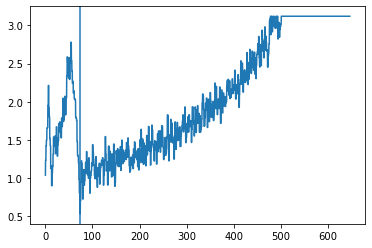

In [6]:
plt.plot(times, calculate_R(beta, sevol, a, N))
plt.axvline(times[np.argmin(calculate_R(beta, sevol, a, N))])

In [7]:
times[np.argmin(calculate_R(beta, sevol, a, N))]

73.00874737583662

In [8]:
def x_fast_vax(t, N, c, ithres):
    return(N-0-(c+ithres)*t)

def w_fast_vax(t, N, c, ithres):
    return((c)*t)

def w_fast_vax_takeover(t, N, c, ithres, T):
    w_T = w_fast_vax(T, N, c, ithres)
    return(N-0-ithres*(t-T))

def w2_fast_vax_takeover(t, N, c, ithres, T):
    return(ithres*(t-T))

def calc_sevol(t,IC,beta,a,pop_size,it,c):
    N = pop_size-IC-it
    s = (beta*(N-(it+c)*t))/a
    return(1/s)

def calc_sevol_after(t,IC,beta,a,pop_size,it,c, T):
    s = (beta*(N-(it)*(t-T)))/a
    return(1/s)

def calc_RMUT(t,IC,beta,a,pop_size,it,c):
    s = calc_sevol(t,IC,beta,a,pop_size,it,c)
    return((s*beta*pop_size)/a)

In [9]:
approx_x = [x_fast_vax(t, 1e6, 10000, 1500) for t in times[:1310]]
approx_w = [w_fast_vax(t, 1e6, 10000, 1500) for t in times[:1310]]
approx_w_takeover = [w_fast_vax_takeover(t, 1e6, 10000, 1500,70) for t in times[1310:]]
approx_w2_takeover = [w2_fast_vax_takeover(t, 1e6, 10000, 1500,70) for t in times[1310:]]

approx_s = [calc_sevol(t,0,beta,a,1e6,1500,10000) for t in times[:600]]
approx_s_after = [calc_sevol_after(t,0,beta,a,1e6,1500,10000, 70) for t in times[800:-200]]
approx_RMT = [calc_RMUT(t,0,beta,a,1e6,1500,10000) for t in times[:600]]

In [10]:
np.searchsorted(times, 70)

911

In [11]:
with open('vaccination_popevol.txt', 'rb') as f:
    vaccination = pickle.load(f)

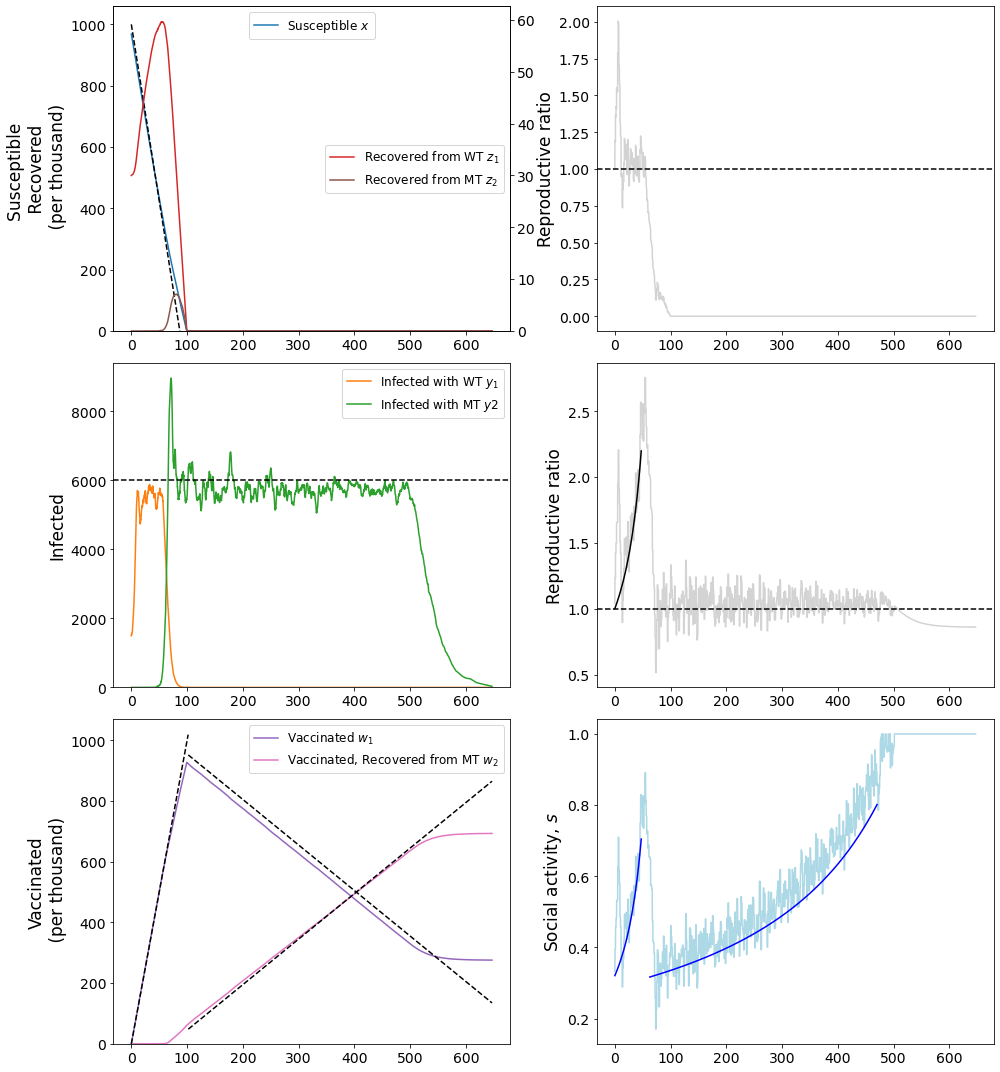

In [12]:
fig, ax = plt.subplots(3,2,figsize=(14,15))

ax[0,0].plot(times, pop_evol[:,0]/1e3, c = 'C0')
ax[0,0].legend(['Susceptible $x$'], fontsize = 12, loc = 'upper center')
ax_z = ax[0,0].twinx()
ax_z.plot(times, pop_evol[:,4]/1e3, c = 'C3')
ax_z.plot(times, pop_evol[:,5]/1e3, c = 'C5')
ax_z.legend(['Recovered from WT $z_1$', 'Recovered from MT $z_2$'], fontsize = 12, loc = 'center right')
#ax[0,0].plot(times, pop_evol[:,4], c = 'C3')
#ax[0,0].plot(times, pop_evol[:,5], c = 'C5')
ax[0,0].plot(times[:1310], np.array(approx_x)/1e3, c='k', linestyle='dashed')

#ax[0,0].legend(['Susceptible $x$', 'Recovered from WT $z_1$', 'Recovered from MT $z_2$'], fontsize = 12)

ax[1,0].plot(times, pop_evol[:,1], c = 'C1')
ax[1,0].plot(times, pop_evol[:,2]+pop_evol[:,3], c = 'C2')
ax[1,0].legend(['Infected with WT $y_1$', 'Infected with MT $y2$'], fontsize = 12)

ax[2,0].plot(times, pop_evol[:,6]/1e3, c = 'C4')
ax[2,0].plot(times, pop_evol[:,7]/1e3, c = 'C6')
ax[2,0].legend(['Vaccinated $w_1$', 'Vaccinated, Recovered from MT $w_2$'], fontsize = 12)
ax[2,0].plot(times[:1310], np.array(approx_w)/1e3, c='k', linestyle='dashed')
ax[2,0].plot(times[1310:], np.array(approx_w_takeover)/1e3, c='k', linestyle='dashed')
ax[2,0].plot(times[1310:], np.array(approx_w2_takeover)/1e3, c='k', linestyle='dashed')

R0 = [((pop_evol[:,0][i]+pop_evol[:,4][i]+pop_evol[:,6][i])*beta*sevol[i])/0.25 for i in range(len(sevol))]
R0_WT = [((pop_evol[:,0][i])*beta*sevol[i])/0.25 for i in range(len(sevol))]

ax[0,1].plot(times, R0_WT, c = 'lightgrey')
ax[1,1].plot(times, R0, c = 'lightgrey')
ax[1,1].plot(times[:600], approx_RMT,  c='k')
ax[2,1].plot(times, sevol,  c='lightblue')
ax[2,1].plot(times[:600], approx_s,  c='blue')
ax[2,1].plot(times[800:-200], approx_s_after,  c='blue')

ax[0,1].axhline(1, c = 'k', linestyle = 'dashed')
ax[1,1].axhline(1, c = 'k', linestyle = 'dashed')

ax[0,0].set_ylabel('Susceptible \n Recovered \n (per thousand)', fontsize = 17)
ax[1,0].set_ylabel('Infected', fontsize = 17)
ax[2,0].set_ylabel('Vaccinated\n (per thousand)', fontsize = 17)
ax[0,1].set_ylabel('Reproductive ratio', fontsize = 17)
ax[1,1].set_ylabel('Reproductive ratio', fontsize = 17)
ax[2,1].set_ylabel('Social activity, $s$', fontsize = 17)

ax[1,0].axhline(4*1500, c = 'k', linestyle = 'dashed')

for i in range(3):
    ax[i,0].set_ylim(bottom=-0)
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)
        #ax[i,j].set_xlim(0,700)
        
ax_z.set_ylim(bottom=0)
ax_z.tick_params(labelsize=14)

plt.tight_layout()
#plt.savefig('approx_vaccination_z0_6SEPT.jpg', dpi = 300)

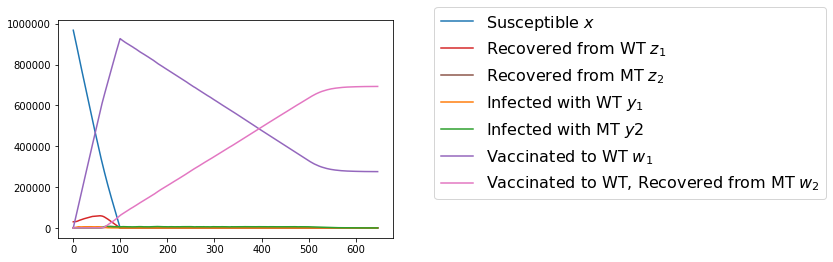

In [14]:
plt.plot(times, pop_evol[:,0], c = 'C0')
plt.plot(times, pop_evol[:,4], c = 'C3')
plt.plot(times, pop_evol[:,5], c = 'C5')
plt.plot(times, pop_evol[:,1], c = 'C1')
plt.plot(times, pop_evol[:,2]+pop_evol[:,3], c = 'C2')
plt.plot(times, pop_evol[:,6], c = 'C4')
plt.plot(times, pop_evol[:,7], c = 'C6')
plt.legend(['Susceptible $x$', 'Recovered from WT $z_1$', 'Recovered from MT $z_2$','Infected with WT $y_1$', 'Infected with MT $y2$','Vaccinated to WT $w_1$', 'Vaccinated to WT, Recovered from MT $w_2$'], fontsize = 16, bbox_to_anchor = (1.1,1.1))

In [14]:
with open('no_vaccination_popevol.txt', 'rb') as f:
    no_vaccination = pickle.load(f)

In [15]:
sevol = np.array(no_vaccination['sevol'])
times = np.array(no_vaccination['times'])
pop_evol =  np.array(no_vaccination['pop_evol'])

In [16]:
def calc_x(t, it, c, IC, N):
    return(N-IC-(it+c)*t)

def calc_z1(t, it, c, IC, N):
    return(IC+(it)*t)

def calc_z2(t, it, c, tkv):
    return(it*t-tkv*it)

def calc_z1_after(t, it, c, tkv, IC, N):
    S0 = N-IC-(it+c)*tkv
    Z0 = IC+(it)*tkv
    W0 = c*tkv
    
    a_Z0 = Z0/(S0+Z0+W0)*it
    b_Z0 = Z0 + a_Z0*tkv
    
    return(-a_Z0*t+b_Z0)
    
def calc_x_after(t, it, c, tkv, IC, N):
    S0 = N-IC-(it+c)*tkv
    Z0 = IC+(it)*tkv
    
    a_S0 = (S0/(S0+Z0))*it
    b_S0 = S0 + a_S0*tkv
    
    #print(a_S0)
    
    return(-a_S0*t+b_S0)

def calc_sevol(t,IC,beta,a,pop_size,it,c):
    N = pop_size-IC-it
    s = (beta*(N-(it+c)*t))/a
    return(1/s)

def calc_sevol_after(t,IC,beta,a,pop_size,it,c,tkv):
    N = pop_size-IC-it
    x = calc_x_after(t, it, c, tkv, IC, N)
    z1 = calc_z1_after(t, it, c, tkv, IC, N)
    w1 = c*t
    s = (beta*(x+z1+w1))/a
    return(1/s)

def calc_RMUT(t,IC,beta,a,pop_size,it,c):
    s = calc_sevol(t,IC,beta,a,pop_size,it,c)
    return((s*beta*pop_size)/a)

def calc_RWT_after(t,IC,beta,a,N,it,c,tkv):
    x = calc_x_after(t, it, c, tkv, IC, N)
    s = calc_sevol(t,IC,beta,a,N,it,c)
    return((s*beta*x)/a)

def calc_w1(t,c):
    return(t*c)

In [17]:
beta1 = beta

In [18]:
np.searchsorted(times, 410)

1215

In [19]:
approx_x = [calc_x(t, 1500, 0, 0, 1e6) for t in times[:1315]]
approx_x_after = [calc_x_after(t, 1500, 0, 410, 0, 1e6) for t in times[1315:]]
approx_z1 = [calc_z1(t, 1500, 0, 0, 1e6) for t in times[:1315]]
approx_z1_after = [calc_z1_after(t, 1500, 0, 410, 0, 1e6) for t in times[1315:]]
approx_z2_after = [calc_z2(t, 1500, 0, 410) for t in times[1315:]]

In [20]:
approx_sevol = [calc_sevol(t,0,beta1,0.25,1e6,1500,0) for t in times[:1315]]
approx_sevol_after = [calc_sevol_after(t,0,beta1,0.25,1e6,1500,0, 410) for t in times[1315:-200]]
approx_RMUT = [calc_RMUT(t,0,beta1,0.25,1e6,1500,0) for t in times[:1315]]
approx_RWT = [calc_RWT_after(t,0,beta1,0.25,1e6,1500,0,410) for t in times[1315:]]

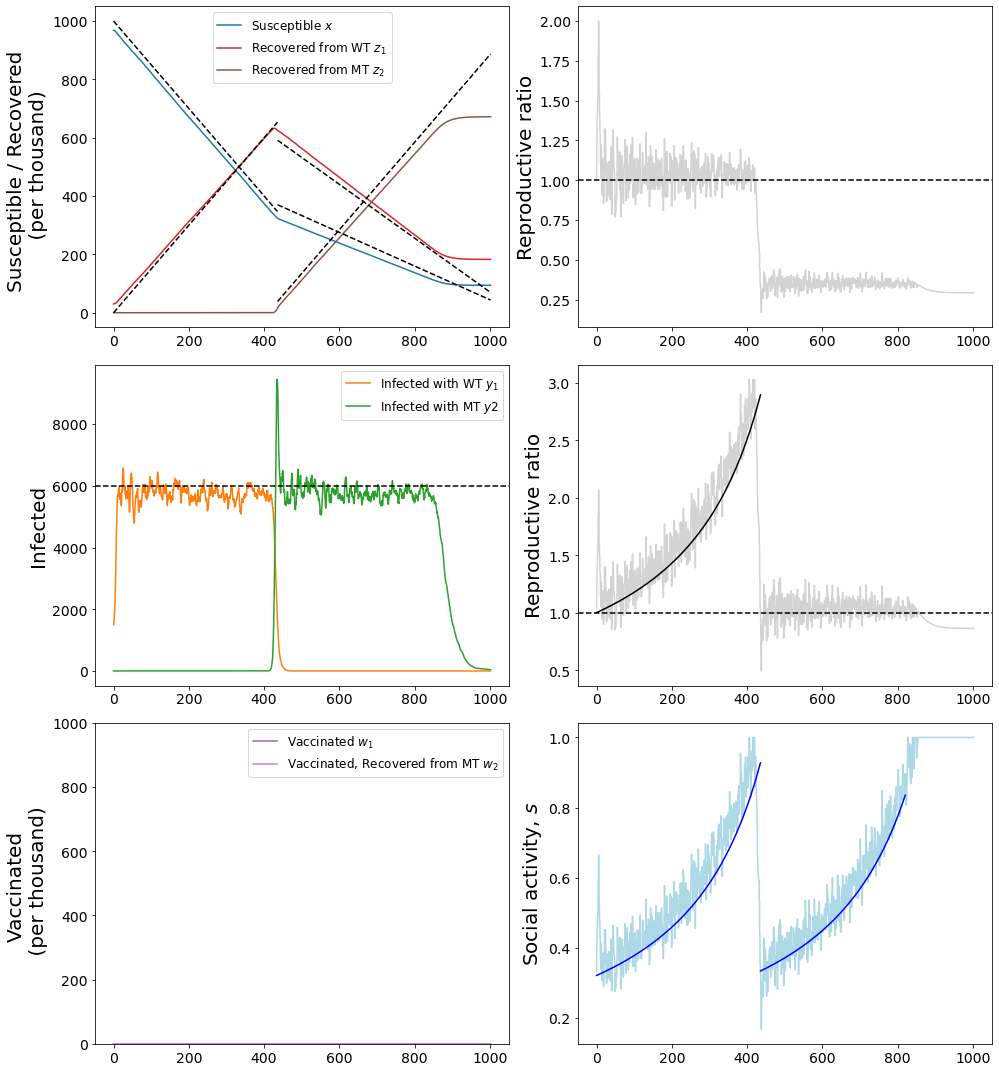

In [26]:
fig, ax = plt.subplots(3,2,figsize=(14,15))

ax[0,0].plot(times, pop_evol[:,0]/1e3, c = 'C0')

ax[0,0].plot(times, pop_evol[:,4]/1e3, c = 'C3')
ax[0,0].plot(times, pop_evol[:,5]/1e3, c = 'C5')

ax[0,0].legend(['Susceptible $x$', 'Recovered from WT $z_1$', 'Recovered from MT $z_2$'], fontsize = 12)


ax[0,0].plot(times[:1315], np.array(approx_x)/1e3, c='k', linestyle='dashed')
ax[0,0].plot(times[1315:], np.array(approx_x_after)/1e3, c='k', linestyle='dashed')
ax[0,0].plot(times[:1315], np.array(approx_z1)/1e3, c='k', linestyle='dashed')
ax[0,0].plot(times[1315:], np.array(approx_z1_after)/1e3, c='k', linestyle='dashed')
ax[0,0].plot(times[1315:], np.array(approx_z2_after)/1e3, c='k', linestyle='dashed')

ax[1,0].plot(times, pop_evol[:,1], c = 'C1')
ax[1,0].plot(times, pop_evol[:,2]+pop_evol[:,3], c = 'C2')
ax[1,0].legend(['Infected with WT $y_1$', 'Infected with MT $y2$'], fontsize = 12)

ax[2,0].plot(times, pop_evol[:,6]/1e3, c = 'C4')
#ax[2,0].plot(times[:1310], approx_w, c='k', linestyle='dashed')
#ax[2,0].plot(times[1310:], approx_w_takeover, c='k', linestyle='dashed')
ax[2,0].plot(times, pop_evol[:,7]/1e3, c = 'C6')
#ax[2,0].plot(times[1310:], approx_w2_takeover, c='k', linestyle='dashed')
ax[2,0].legend(['Vaccinated $w_1$', 'Vaccinated, Recovered from MT $w_2$'], fontsize = 12)


R0 = [((pop_evol[:,0][i]+pop_evol[:,4][i]+pop_evol[:,6][i])*beta*sevol[i])/0.25 for i in range(len(sevol))]
R0_WT = [((pop_evol[:,0][i])*beta*sevol[i])/0.25 for i in range(len(sevol))]

ax[0,1].plot(times, R0_WT, c = 'lightgrey')
ax[1,1].plot(times, R0, c = 'lightgrey')
ax[1,1].plot(times[:1315], approx_RMUT,  c='k')
ax[2,1].plot(times, sevol,  c='lightblue')
ax[2,1].plot(times[:1315], approx_sevol,  c='blue')
ax[2,1].plot(times[1315:-200], approx_sevol_after,  c='blue')

ax[0,1].axhline(1, c = 'k', linestyle = 'dashed')
ax[1,1].axhline(1, c = 'k', linestyle = 'dashed')

ax[0,0].set_ylabel('Susceptible / Recovered \n (per thousand)', fontsize = 20)
ax[1,0].set_ylabel('Infected', fontsize = 20)
ax[2,0].set_ylabel('Vaccinated \n (per thousand)', fontsize = 20)
ax[0,1].set_ylabel('Reproductive ratio', fontsize = 20)
ax[1,1].set_ylabel('Reproductive ratio', fontsize = 20)
ax[2,1].set_ylabel('Social activity, $s$', fontsize = 20)
ax[1,0].axhline(4*1500, c = 'k', linestyle = 'dashed')

ax[2,0].set_ylim(0,1000)

for i in range(3):
    for j in range(2):
        ax[i,j].tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('approx_no_vaccination_z0_14SEPT.jpg', dpi = 300)

### calculating probability colormap

In [81]:
def herd_immunity_time(beta, a, N, it, c):
    num = (1-(a/(beta*N)))*N
    den = c
    return(int(num/den))

def probability_mutant(t, c, L, mu, N):
    num = -c*L*mu*t**2
    den = 2*N
    return(np.exp(num/den))

def probability_mutant_2(t, c, L, mu, N):
    num = L*mu*(t-(0.5*c*t**2))
    den = N
    return(np.exp(num/den))

In [83]:
def calc_prob_takeover(mu,IC,beta,a,pop_size,it,c):
    TH = herd_immunity_time(beta, a, pop_size, it, c)
    RMT = np.mean([calc_RMUT(t,IC,beta,a,pop_size,it,c) for t in range(TH)])
    p = 1-(1-mu*(1-1/RMT))**(it*TH)
    return(p)

def calc_prob_takeover_true(mu,IC,beta,a,pop_size,it,c):
    TH = herd_immunity_time(beta, a, pop_size, it, c)
    p = 1
    #print('Time to Herd Immunity: ', TH)
    for t in range(TH):
        RMT = calc_RMUT(t,IC,beta,a,pop_size,it,c)
        p *= (1-mu*(1-1/RMT))**it
        #print(p)
    return(1-p)

def time_takeover(mu,IC,beta,a,pop_size,it,c):
    TH = herd_immunity_time(beta, a, pop_size, it, c)
    RMT = np.mean([calc_RMUT(t,IC,beta,a,pop_size,it,c) for t in range(TH)])
    p = 1-(1-mu*(1-1/RMT)*it)
    return(1/p)

In [84]:
import pickle
import pandas as pd

In [85]:
with open('colormaps/paramgrid_appearance_realistic.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [91]:
all_param_table = pd.DataFrame()
all_param_table = all_param_table.append(param_grid)

i_values = sorted(list(set(all_param_table['i_threshold'])))
c_values = sorted(list(set(all_param_table['c'])))

In [92]:
calc_matrix_1e6 = np.zeros((25,25))
calc_matrix_1e5 = np.zeros((25,25))

for i in range(25):
    for c in range(25):
        TH = herd_immunity_time(beta, a, 1e6, i_values[i], c_values[c])
        calc_matrix_1e5[i,c] = 1-calc_prob_takeover_true(1e-5,30000,beta,a,pop_size,i_values[i],c_values[c])
        calc_matrix_1e6[i,c] = 1-calc_prob_takeover_true(1e-6,30000,beta,a,pop_size,i_values[i],c_values[c])
        #calc_matrix_1e5[-i,c] = probability_mutant(1e-5,IC,beta,a,pop_size,i_values[i],c_values[c])

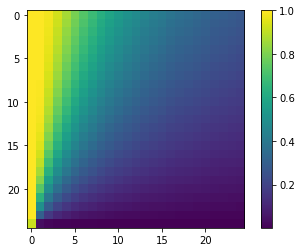

In [93]:
plt.imshow(1-calc_matrix_1e5[::-1])
plt.colorbar()

In [94]:
with open('probability_colormap_for_comparison.txt', 'wb') as f:
    pickle.dump([calc_matrix_1e6,calc_matrix_1e5],f)

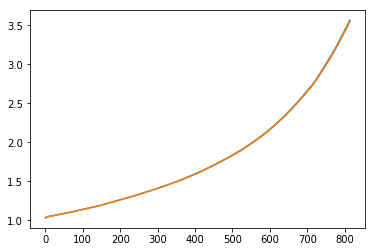

In [42]:
plt.plot([calc_RMUT(t,30000,beta1,0.25,1e6,1500,1000) for t in times[:815]])
plt.plot([simplified_RMT(t,1e6, 1500, 1000) for t in times[:815]])

In [39]:
def simplified_RMT(t, N, L, c):
    return(N/(N-30000-(L+c)*t))

In [54]:
calc_prob_takeover(1e-6,149e6,9.375e-11,a,8e9,8e5,16.5e6)

nan

In [53]:
0.75/8e9

9.375e-11

In [67]:
N = 8e9
beta = 0.75/8e9
a = 0.25

print((1-(a/(beta*N)))*N)

5333333333.333334


In [137]:
herd_immunity_time(9.375e-11, a, 8e9, 8e5, 16.5e6)

308

In [141]:
RMT = np.mean([calc_RMUT(t,149e6,beta,a,N,8e5,16.5e6) for t in range(308)])

In [36]:
def herd_immunity_time(beta, a, N, it, c):
    num = (1-(a/(beta*N)))*N
    den = it+c
    return(int(num/den))

### 1) Homogeneous World

In [149]:
# World Data
calc_prob_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,16.5e6)

0.999961239726636

In [150]:
time_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,16.5e6)

30.320587512537596

In [153]:
# France Vaccination Rate
calc_prob_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,0.75*8*1e7)

0.9405617779960647

In [154]:
time_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,0.75*8*1e7)

30.820268336599273

In [155]:
# USA Vaccination Rate
calc_prob_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,1.20*8*1e7)

0.8326595980288333

In [156]:
time_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,1.20*8*1e7)

30.76535529023194

In [157]:
# Israel Vaccination Rate
calc_prob_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,216000000)

0.5240450892981112

In [159]:
time_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8e5,216000000)

32.326186769236536

In [164]:
time_takeover(1e-7, 149e6,0.75/8e9,a,8e9,8*1e4,216000000)

324.6343209766425

### 2) Heterogeneous World

In [399]:
beta_fast = 0.75/(N*0.75)
beta_slow = 0.75/(N*0.25)

In [442]:
two_billion = calc_prob_takeover(1e-7, 0,beta_fast,a,0.25*N,0.25*8e5,0.25*8*1.20*1e7)
six_billion = calc_prob_takeover(1e-7, 0,beta_slow,a,0.75*N,0.75*8e5,0.75*8*0.75*1e7)

In [443]:
print(two_billion, six_billion)

0.08675057532550245 0.945750340739549


In [444]:
1-(1-two_billion)*(1-six_billion)

0.9504565298916056

In [451]:
two_billion = calc_prob_takeover(1e-7, 0,beta_fast,a,0.25*N,0.25*8e5,0.25*216000000)
six_billion = calc_prob_takeover(1e-7, 0,beta_slow,a,0.75*N,0.75*8e5,0.75*8*0.75*1e7)

In [452]:
1-(1-two_billion)*(1-six_billion)

0.9477882118471275

In [61]:
TH = herd_immunity_time(0.75/8e9, a, 8e9, 8e5, 16.5e6)

In [62]:
TH

308

In [64]:
1-probability_mutant_2(TH, 16.5e6, 8e5, 1e-7, 8e9)

0.9996008925970296

In [95]:
TH = herd_immunity_time(0.75/8e9, a, 8e9, 8e5, 216000000)

In [96]:
1-probability_mutant_2(TH, 216000000, 8e5, 1e-7, 8e9)

0.4631733238316763

In [125]:
TH = herd_immunity_time(0.75/1e6, a, 1e6, 1000, 10)
print(1-probability_mutant_2(TH, 10, 1000, 1e-6, 1e6))

0.0021749713147184435


In [170]:
calc_prob_takeover(1e-5, 0,0.75/1e6,a,1e6,1500,12500)

0.2353703213074908

In [166]:
calc_prob_takeover(1e-5, 0,0.75/1e6,a,1e6,1000,10000)

0.022732227258232762